In [29]:
%pylab inline
import datetime as dt
basePath = "/home/willy/Downloads/"

fname1 = basePath + "2022-04-17-1.csv"
fname2 = basePath + "2022-04-18-1.csv"
fname3 = basePath + "2022-04-23.csv"
fname4 = basePath + "2022-04-24-4.csv"

def readFiles(fname, data=[]):
    if isinstance(fname, list):
        data=[]
        for item in fname:
            data = readFiles(item, data=data)
        return data

    with open(fname, 'r') as f:
        for line in f:
            if line.strip() != '':
                data.append(line[:-1].split(','))
    return data


Populating the interactive namespace from numpy and matplotlib


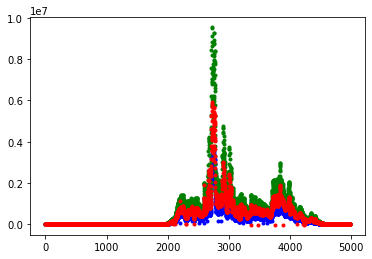

In [30]:
#data = readFiles([fname1,fname2])
data = readFiles([fname4])

timedates,temps,hums,luz_irs,luz_fulls,luz_luxs, wifis, tspeaks = list(zip(*data))

timedates = array([dt.datetime.strptime(item, "%Y-%m-%d %H:%M:%S") for item in timedates])
temps     = array([float(item) for item in temps])
hums      = array([float(item) for item in hums])
luz_irs   = array([float(item) for item in luz_irs])
luz_fulls = array([float(item) for item in luz_fulls])
luz_luxs  = array([float(item) for item in luz_luxs])
wifis     = array([bool(int(item)) for item in wifis])
tspeaks   = array([bool(int(item)) for item in tspeaks])

def enderezame(a):
    base = 0.
    y = [a[0]]
    y=[0]
    for i in range(1,len(a)):
        d = a[i]-a[i-1]
        if abs(d)//(2**16*2.3/4)>0:
            base = base - sign(d)*2**16
        y.append(a[i]+base)
    return array(y)

#luz_irs = enderezame(luz_irs)
#luz_fulls = enderezame(luz_fulls)
luz_vis = luz_fulls - luz_irs

plot(luz_irs,'b.')
plot(luz_fulls,'g.')
plot(luz_vis,'r.')
#ylim(-1000,1000)

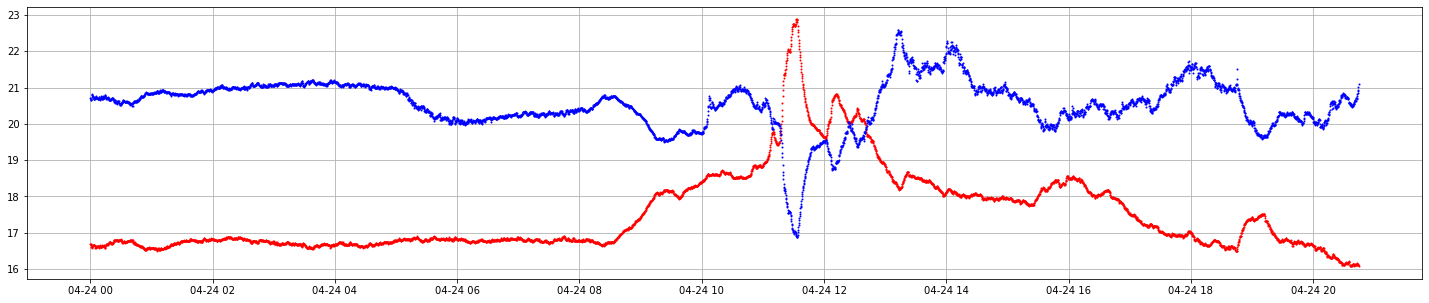

In [31]:
figure(figsize=(25,5))
plot(timedates,temps,'r.',markersize=2)
plot(timedates,hums/2,'b.',markersize=2)
grid()

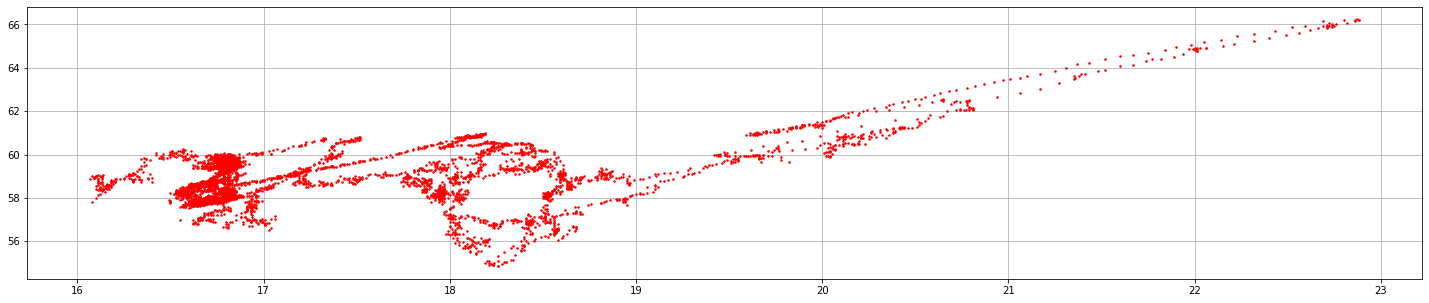

In [32]:
figure(figsize=(25,5))
plot(temps,100-hums,'r.',markersize=3)
grid()

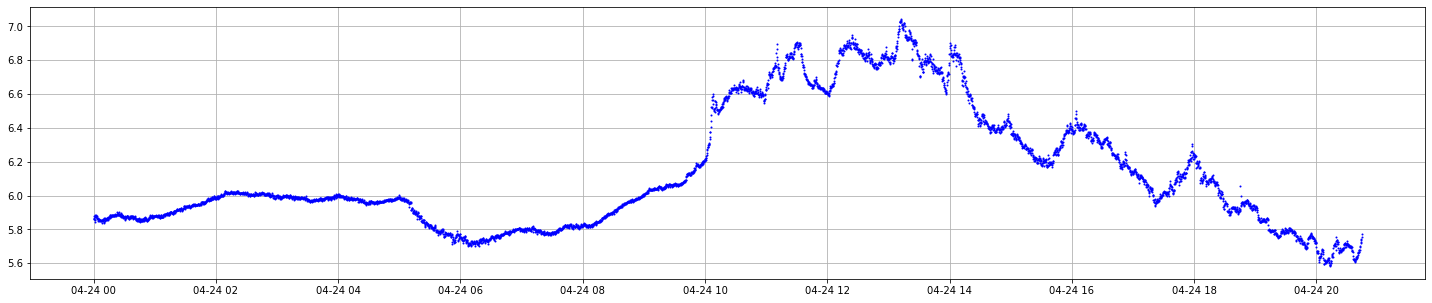

In [50]:
hh = (6.112 * exp((17.67*temps)/(temps+243.5)) * hums * 2.1674) / (273.15+temps)
figure(figsize=(25,5))
plot(timedates,hh,'b.',markersize=2)
#plot(timedates,hums/4,'r.',markersize=3)
grid()

(0.0, 7355.79705)

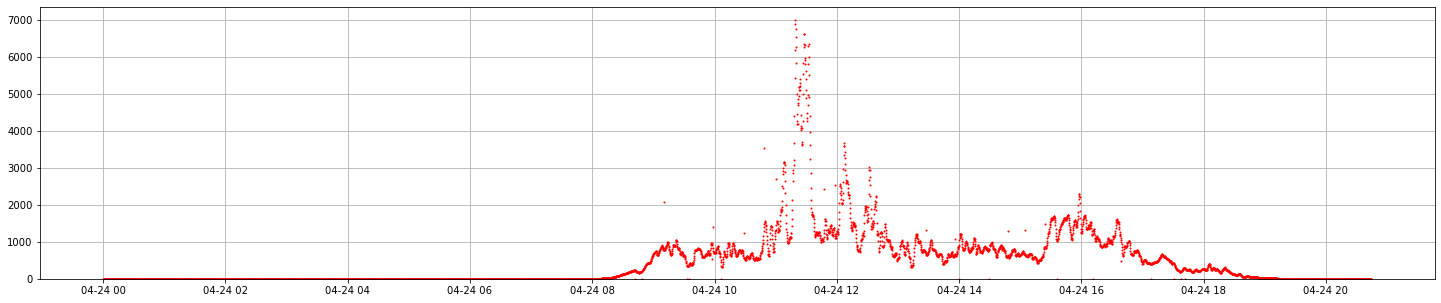

In [33]:
figure(figsize=(25,5))
#plot(timedates,luz_luxs,'b-')
plot(timedates,luz_luxs,'r.',markersize=2)
grid()
ylim(0,)

(0.52, 0.85)

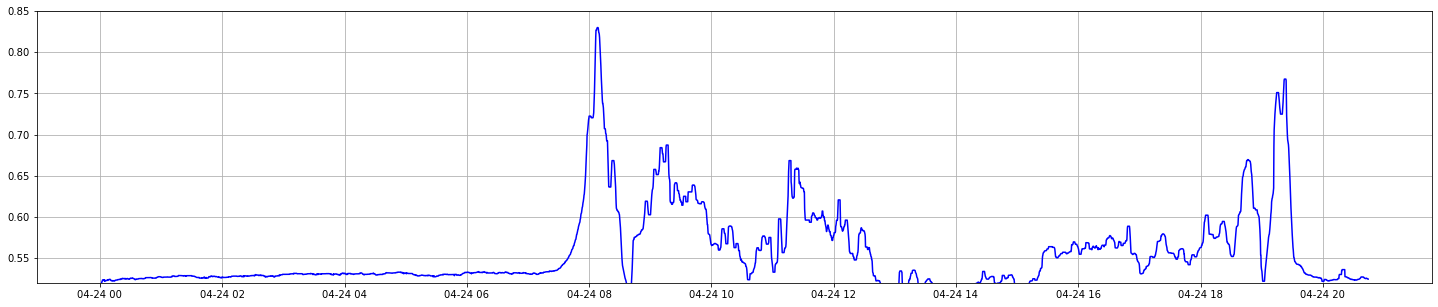

In [44]:
from scipy.signal import medfilt

figure(figsize=(25,5))
#plot(timedates,luz_luxs,'b-')

quo = luz_irs/luz_vis
quo_f = medfilt(quo,15)
plot(timedates,quo_f,'b-',markersize=2)
#plot(timedates,luz_fulls,'g.',markersize=2)
grid()
#ylim(0,10)
ylim(0.52,.85)

0.6596984924623116

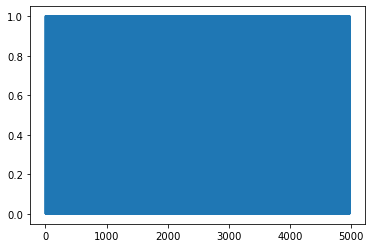

In [38]:
plot(tspeaks)
mean(tspeaks)

1.0

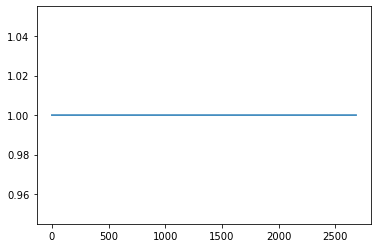

In [8]:
plot(wifis)
mean(wifis)

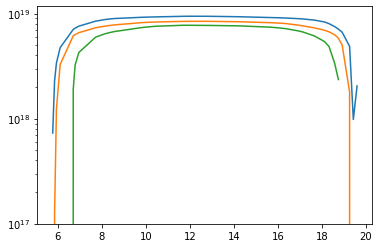

In [21]:
with open('espectros.csv', 'r') as f:
    first = True
    xs, c1s, c2s, c3s = [],[],[],[]
    for line in f:
        if first:
            first=False
            continue
        #print(line[:-1])
        x,c1,c2,c3 = line[:-1].split(',')
        xs.append(float(x))
        c1s.append(float(c1))
        c2s.append(float(c2))
        c3s.append(float(c3))

plot(xs,c1s)
plot(xs,c2s)
plot(xs,c3s)
yscale('log')

(2.0, 7.543646931077242)

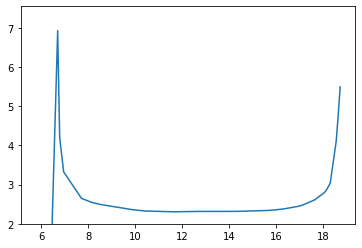

In [22]:
plot(xs,(array(c1s)+array(c2s))/array(c3s))
ylim(2,)